In [1]:
# Importing Libraries
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,GlobalAveragePooling2D,MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras import optimizers
from keras.callbacks import ModelCheckpoint, History
from matplotlib import pyplot as plt
import cv2,os
import numpy as np


In [2]:
# loading the dataset
data_path='dataset'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))] #empty dictionary

label_dict=dict(zip(categories,labels)) 

print(label_dict)
print(categories)
print(labels)

{'bill_gates': 0, 'dwayne_johnson': 1, 'anne_hathaway': 2, 'pins_Rihanna': 3}
['bill_gates', 'dwayne_johnson', 'anne_hathaway', 'pins_Rihanna']
[0, 1, 2, 3]


In [3]:
img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            # #Coverting the image into gray scale
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            #resizing the gray scale into 100x100
            resized=cv2.resize(gray,(img_size,img_size))
            #appending the image and the label(categorized) into the list (dataset)
            data.append(resized)
            target.append(label_dict[category])
            

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [4]:
# normalize the imaages
data=np.array(data)/255.0

# reshaping to 4D array
data=np.reshape(data,(data.shape[0],img_size,img_size,1))

target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

In [5]:
# saving the data and target
np.save('data',data)
np.save('target',new_target)

In [6]:
# loading the save numpy arrays 
data=np.load('data.npy')
target=np.load('target.npy')


In [7]:
# neural network architecture

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(4,activation='softmax'))
#The Final layer with two outputs for two categories

print(model.summary())
print(model.input.shape)

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 200)       2000      
_________________________________________________________________
activation (Activation)      (None, 98, 98, 200)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 200)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 100)       180100    
_________________________________________________________________
activation_1 (Activation)    (None, 47, 47, 100)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 100)       0         
_________________________________________________________________
flatten (Flatten)            (None, 52900)             0

In [8]:
# splitting the dataset into 90% training and 10% testing
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [9]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

# Train the neural network
history=model.fit(train_data,train_target,epochs=10,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/10
22/22 [==============================] - ETA: 0s - loss: 1.3832 - accuracy: 0.3449WARNING:tensorflow:From /home/sunil/anaconda3/lib/python3.8/site-packages/tensorflow/python/training/tracking/tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model-001.model/assets
22/22 [==============================] - 22s 1s/step - loss: 1.3832 - accuracy: 0.3449 - val_loss: 1.1592 - val_accuracy: 0.5665
Epoch 2/10
22/22 [==============================] - 22s 1s/step - loss: 0.9234 - accuracy: 0.6290 - val_loss: 0.8861 - val_accuracy: 0.6301
Epoch 3/10
22/22 [==============================] - 23s 1s/step - loss: 0.6473 - accuracy: 0.7493

In [10]:
model.save('model-009.model')

INFO:tensorflow:Assets written to: model-009.model/assets


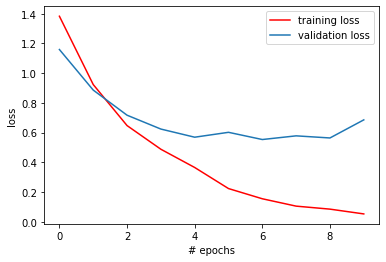

In [11]:
# plotting training and validation loss
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

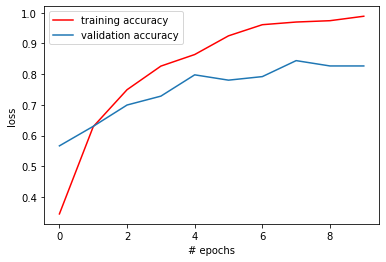

In [12]:
# plotting training and validation accuracy
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [13]:
print(model.evaluate(test_data,test_target))

3/3 [==============================] - 1s 179ms/step - loss: 0.5392 - accuracy: 0.8854
[0.539158284664154, 0.8854166865348816]
